In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.utils.data as data

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = datasets.CIFAR10(root = "/content/", train = True, download = True, transform = transform)
trainloader = data.DataLoader(trainset, batch_size = 4, shuffle = False, num_workers = 2)

testset = datasets.CIFAR10(root = "/content/", train = False, download = True, transform = transform)
testloader = data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/cifar-10-python.tar.gz to /content/
Files already downloaded and verified


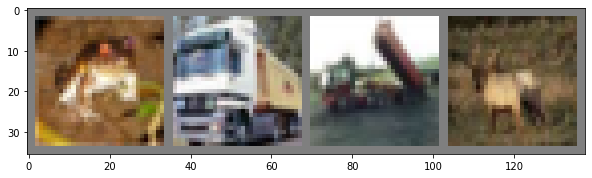

 frog	 	truck	 	truck	 	 deer


In [ ]:
def imshow(img):
  plt.figure(figsize=(10, 10))
  img = img /2 + 0.5  #Unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()


#get some random training image
dataiter = iter(trainloader)
images, labels = dataiter.next()

#show image
imshow(torchvision.utils.make_grid(images))

#print label
print('\t \t'.join('%5s' % classes[labels[j]] for j in range (4)))

In [ ]:
class MLP(nn.Module):

  def __init__(self, n_input_neurons, n_output_neurons):
    super().__init__()

    self.main = nn.Sequential(
        nn.Linear(n_input_neurons, 256),
        nn.LeakyReLU(negative_slope=0.2, inplace = True),
        nn.Linear(256, 128),
        nn.LeakyReLU(negative_slope=0.2, inplace = True),
        nn.Linear(128, n_output_neurons)
    )

  def forward(self, x):
    #where x has a shape [batch_size, number of channel, height, width]
    batch_size = x.shape[0]
    x = x.view(batch_size, -1)
    return self.main(x)


In [ ]:
height, width = images.shape[2:]

In [ ]:
height, width

(32, 32)

In [ ]:
net = MLP(n_input_neurons= 3*height*width, n_output_neurons=10) #number of classes 10, .cuda() if GPU available

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

In [ ]:
for epoch in range(5):

  running_loss = 0.0

  for i, data in enumerate(trainloader, 0):
    images, labels = data
    # images, labels = images.cuda(), labels.cuda()

    #gradients to zero
    optimizer.zero_grad()

    #forward pass and loss
    output = net(images)
    loss = criterion(output, labels)

    loss.backward()
    optimizer.step()

    #print progress
    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d]  loss: %.3f' %
            (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0
      
print("Finish Training!")

[1,  2000]  loss: 1.935
[1,  4000]  loss: 1.825
[1,  6000]  loss: 1.766
[1,  8000]  loss: 1.730
[1, 10000]  loss: 1.736
[1, 12000]  loss: 1.713
[2,  2000]  loss: 1.667
[2,  4000]  loss: 1.655
[2,  6000]  loss: 1.620
[2,  8000]  loss: 1.608
[2, 10000]  loss: 1.618
[2, 12000]  loss: 1.614
[3,  2000]  loss: 1.586
[3,  4000]  loss: 1.573
[3,  6000]  loss: 1.551
[3,  8000]  loss: 1.532
[3, 10000]  loss: 1.548
[3, 12000]  loss: 1.551
[4,  2000]  loss: 1.525
[4,  4000]  loss: 1.521
[4,  6000]  loss: 1.493
[4,  8000]  loss: 1.482
[4, 10000]  loss: 1.508
[4, 12000]  loss: 1.509
[5,  2000]  loss: 1.484
[5,  4000]  loss: 1.481
[5,  6000]  loss: 1.452
[5,  8000]  loss: 1.442
[5, 10000]  loss: 1.471
[5, 12000]  loss: 1.469
Finish Training!


In [ ]:
def get_accuracy(net):
  correct = 0
  total = 0
  with torch.no_grad():
    images, labels = data
    # print(images.shape)
    # images, labels = images.cuda(), labels.cuda()
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print("Accuracy on test image : %d %%" % (100 * (correct / total)))

In [ ]:
get_accuracy(net)

Accuracy on test image : 50 %
